# **PART A**


---



> **DOMAIN:** Botanical Research

---



> **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a
classifier capable of determining a plant's species from a photo.

---



> **DATA DESCRIPTION:** The dataset comprises of images from 12 plant species.

> **Source:** https://www.kaggle.com/c/plant-seedlings-classification/data.

---



> **PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo.

---



> **STEPS AND TASKS:**

---



> ## **1. Import and Understand the data**

---



>> ### **A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.**

>> `Hint: You can extract it Manually by losing 2 marks.`

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/My Drive/GREAT LEARNING MATERIALS/PGP AIML/Module 9: Computer Vision/Alternate project/Dataset/plant-seedlings-classification.zip'
# Path to extract the files
extracted_folder_path = '/content/drive/My Drive/GREAT LEARNING MATERIALS/PGP AIML/Module 9: Computer Vision/Alternate project/Dataset/plant-seedlings-classification'

# Create the directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print("Extraction complete.")

Extraction complete.


>> ### **B. Map the images from train folder with train labels to form a DataFrame.**

>> `Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image.`

---



In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Directory where the images are extracted
dataset_dir = '/content/drive/My Drive/GREAT LEARNING MATERIALS/PGP AIML/Module 9: Computer Vision/Alternate project/Dataset/plant-seedlings-classification/plant-seedlings-classification/train'

# Initialize lists to store data
image_names = []
species = []
images = []

# Loop through each species directory
for species_name in os.listdir(dataset_dir):
    species_dir = os.path.join(dataset_dir, species_name)
    if os.path.isdir(species_dir):
        # Loop through each image file in the species directory
        for image_name in os.listdir(species_dir):
            if image_name.endswith('.png'):
                # Get the full path of the image
                image_path = os.path.join(species_dir, image_name)

                # Load the image
                image = Image.open(image_path)

                # Append data to lists
                image_names.append(image_name)
                species.append(species_name)
                images.append(np.array(image))  # Convert image to numpy array

# Create DataFrame
data = {
    'Name of Image': image_names,
    'Species': species,
    'Image': images
}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,Name of Image,Species,Image
0,6a4ef17c2.png,Cleavers,"[[[72, 61, 45], [73, 66, 50], [49, 47, 28], [4..."
1,0515bc601.png,Cleavers,"[[[161, 156, 146], [162, 156, 146], [162, 156,..."
2,0ac327873.png,Cleavers,"[[[91, 78, 67], [88, 73, 63], [88, 74, 63], [9..."
3,94f82e916.png,Cleavers,"[[[80, 62, 45], [78, 57, 42], [81, 60, 46], [8..."
4,2c5c4d127.png,Cleavers,"[[[137, 98, 62], [135, 96, 59], [136, 97, 62],..."


>> ### **C. Write a function that will select n random images and display images along with its species.**

>> `Hint: If input for function is 5, it should print 5 random images along with its labels.`

---



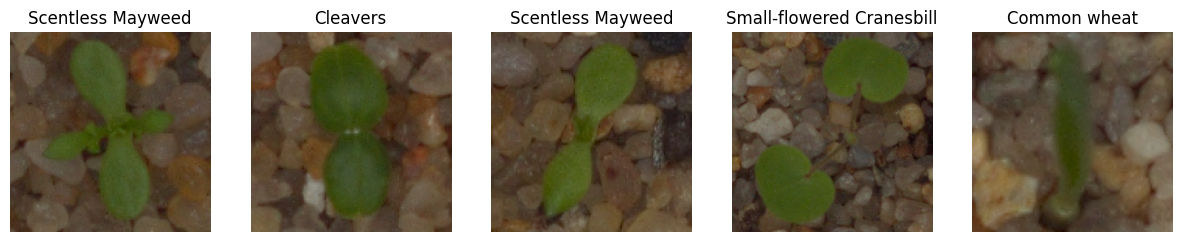

In [ ]:
import random
import matplotlib.pyplot as plt

def display_random_images(df, n):
    """
    Display n random images along with their species labels.

    Parameters:
    - df: DataFrame containing image data and species labels.
    - n: Number of random images to display.
    """
    # Select n random rows from the DataFrame
    random_indices = random.sample(range(len(df)), n)
    random_images = df.iloc[random_indices]

    # Plot the images
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, row in enumerate(random_images.iterrows()):
        image = row[1]['Image']
        species = row[1]['Species']
        axes[i].imshow(image)
        axes[i].set_title(species)
        axes[i].axis('off')
    plt.show()

# Display 5 random images
display_random_images(df, 5)


> ## **2. Data preprocessing**

---



>> ### **A. Create X & Y from the DataFrame.**

---



In [ ]:
def create_X_Y(df, target_size, num_channels=3):
    """
    Create feature matrix X and target vector Y from the DataFrame.
    Resize images to a uniform size and ensure all images have the same number of channels.

    Parameters:
    - df: DataFrame containing image data and species labels.
    - target_size: Tuple specifying the target size (height, width) for resizing.
    - num_channels: Number of channels for the images.

    Returns:
    - X: Feature matrix containing image data (numpy array).
    - Y: Target vector containing species labels.
    """
    from PIL import Image

    # Initialize lists to store resized images and species labels
    resized_images = []
    Y = []

    # Resize images and store species labels
    for index, row in df.iterrows():
        image = row['Image']
        species = row['Species']

        # Convert image to PIL Image
        image_pil = Image.fromarray(image)

        # Resize image to target size
        image_resized = image_pil.resize(target_size)

        # Ensure all images have the same number of channels
        if image_resized.mode != 'RGB':
            image_resized = image_resized.convert('RGB')

        # Convert resized image to numpy array and append to list
        resized_images.append(np.array(image_resized))

        # Append species label to Y
        Y.append(species)

    # Convert lists to numpy arrays
    X = np.array(resized_images)
    Y = np.array(Y)

    return X, Y

# Create X & Y from the DataFrame
target_size = (100, 100)  # Define the target size for resizing
X, Y = create_X_Y(df, target_size)


>> ### **B. Encode labels of the images.**

---



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels
Y_encoded = label_encoder.fit_transform(Y)

# Display the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


>> ### **C. Unify shape of all the images.**

---



In [ ]:
def resize_images(X, target_size):
    """
    Resize all images in the feature matrix X to a unified shape.

    Parameters:
    - X: Feature matrix containing image data.
    - target_size: Tuple specifying the target size (height, width) for resizing.

    Returns:
    - resized_images: List of resized image arrays.
    """
    from PIL import Image

    resized_images = []
    for img_array in X:
        img = Image.fromarray(img_array)
        img_resized = img.resize(target_size)
        resized_images.append(np.array(img_resized))
    return np.array(resized_images)

# Define the target size for resizing (e.g., 224x224)
target_size = (100, 100)

# Resize images in X to the target size
X_resized = resize_images(X, target_size)

>> ### **D. Normalise all the images.**

---



In [ ]:
def normalize_images(images):
    """
    Normalize the pixel values of all images to the range [0, 1].

    Parameters:
    - images: List of image arrays.

    Returns:
    - normalized_images: List of normalized image arrays.
    """
    normalized_images = []
    for img_array in images:
        # Normalize pixel values to the range [0, 1]
        normalized_img_array = img_array.astype('float32') / 255.0
        normalized_images.append(normalized_img_array)
    return normalized_images

# Normalize images
X_resized_normalized = normalize_images(X_resized)


> ## **3. Model training**
> ```
Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels).
If not, you need to correct it otherwise it will be issue during model training.
```



---



In [ ]:
# Check the shapes of images in X_normalized
normalized_shapes = [img.shape for img in X_resized_normalized]
unique_normalized_shapes = set(normalized_shapes)
print("Unique shapes in X_resized_normalized:", unique_normalized_shapes)

Unique shapes in X_resized_normalized: {(100, 100, 3)}


>> ### **A. Split the data into train and test data.**

---



In [ ]:
# Check the shape of X
print("Shape of X before reshaping:", X.shape)

# Reshape X if necessary
if len(X.shape) == 3:
    # Add a single channel dimension (assuming grayscale images)
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

# Verify the new shape of X
print("Shape of X after reshaping:", X.shape)


Shape of X before reshaping: (4750, 224, 224, 3)
Shape of X after reshaping: (4750, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_resized_normalized, Y_encoded, test_size=0.2, random_state=42)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Display the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (3800, 100, 100, 3)
Shape of X_test: (950, 100, 100, 3)
Shape of Y_train: (3800,)
Shape of Y_test: (950,)


>> ### **B. Create new CNN architecture to train the model.**

---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes):
    """
    Create a CNN model for image classification.

    Parameters:
    - input_shape: Tuple specifying the shape of input images (height, width, channels).
    - num_classes: Number of classes (i.e., plant species) for classification.

    Returns:
    - model: CNN model for image classification.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = X_train.shape[1:]
num_classes = len(np.unique(Y_train))

# Create the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)

# Display the model summary
cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

>> ### **C. Train the model on train data and validate on test data.**

---



In [ ]:
# Train the model
history = cnn_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
119/119 [==============================] - 116s 956ms/step - loss: 1.9839 - accuracy: 0.3097 - val_loss: 1.6867 - val_accuracy: 0.4095
Epoch 2/10
119/119 [==============================] - 93s 787ms/step - loss: 1.4830 - accuracy: 0.4755 - val_loss: 1.2418 - val_accuracy: 0.6095
Epoch 3/10
119/119 [==============================] - 98s 818ms/step - loss: 1.2087 - accuracy: 0.5776 - val_loss: 1.0279 - val_accuracy: 0.6684
Epoch 4/10
119/119 [==============================] - 91s 767ms/step - loss: 0.9483 - accuracy: 0.6839 - val_loss: 0.7946 - val_accuracy: 0.7453
Epoch 5/10
119/119 [==============================] - 95s 803ms/step - loss: 0.8423 - accuracy: 0.7161 - val_loss: 0.8227 - val_accuracy: 0.7453
Epoch 6/10
119/119 [==============================] - 87s 735ms/step - loss: 0.7461 - accuracy: 0.7408 - val_loss: 0.7328 - val_accuracy: 0.7726
Epoch 7/10
119/119 [==============================] - 96s 807ms/step - loss: 0.6597 - accuracy: 0.7750 - val_loss: 0.6511 - val_a

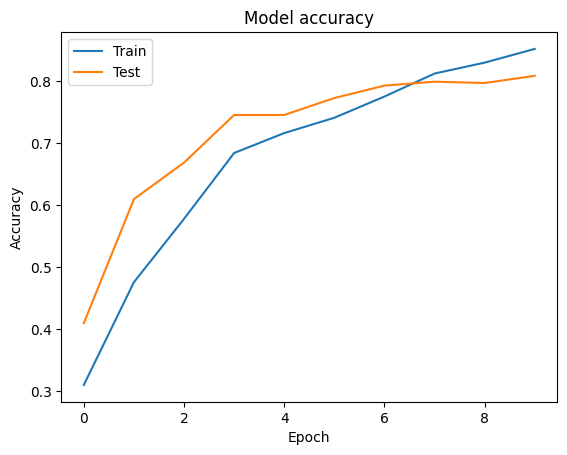

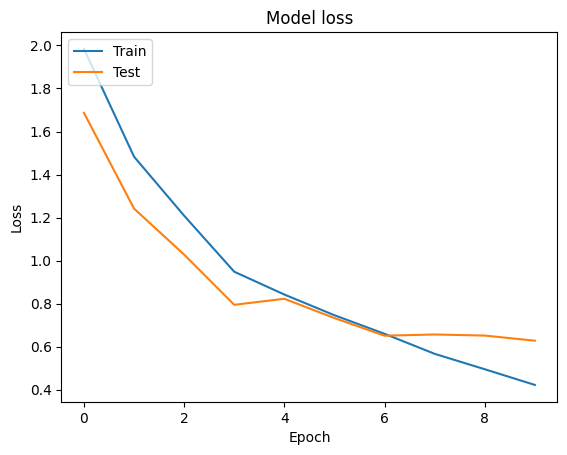

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**INSIGHTS**

* **Consistent Improvement:** Both training and validation accuracies show a steady improvement across epochs, indicating that the model is learning well.

* **Generalization:** The gap between training and validation accuracies is relatively small, suggesting good generalization to unseen data.

* **Potential for Overfitting:** Although the training accuracy is higher than the validation accuracy, the relatively small difference suggests that overfitting is not a major issue at this point. However, further monitoring is recommended if training continues.

---



**RECOMMENDATIONS FOR IMPROVEMENT**

* **Hyperparameter Tuning:** Experiment with different learning rates, batch sizes, and number of epochs to optimize model performance.

* **Data Augmentation:** Apply data augmentation techniques to artificially expand the training dataset and enhance generalization.

* **Regularization Techniques:** Implement dropout layers or L2 regularization to further mitigate potential overfitting.

* **Advanced Architectures:** Explore using more complex architectures or pre-trained models like VGG16, ResNet, or Inception for potentially better performance.

---



>> ### **D. Select a random image and print actual label and predicted label for the same.**

---



1/1 [==============================] - 0s 136ms/step


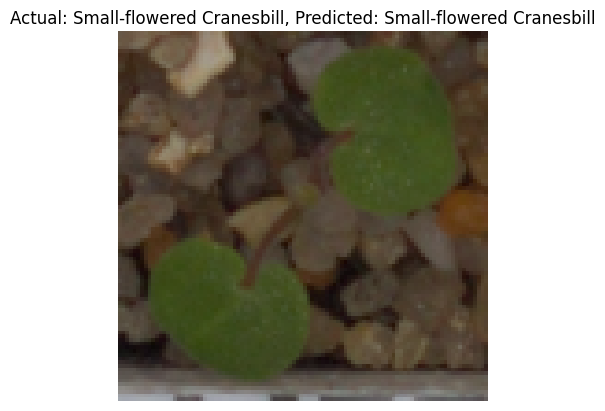

In [ ]:
import random
import matplotlib.pyplot as plt

# Select a random index from the test set
random_index = random.randint(0, len(X_test) - 1)

# Get the random image and its corresponding label
random_image = X_test[random_index]
actual_label = Y_test[random_index]

# Reshape the image to match the input shape expected by the model
random_image = np.expand_dims(random_image, axis=0)

# Predict the label for the random image using the trained model
predicted_label = cnn_model.predict(random_image)
predicted_label = np.argmax(predicted_label)

# Convert the encoded labels back to their original classes
actual_label = label_encoder.inverse_transform([actual_label])[0]
predicted_label = label_encoder.inverse_transform([predicted_label])[0]

# Display the image
plt.imshow(random_image.squeeze())  # Squeeze to remove the single dimension
plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:
# Print the actual and predicted labels
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label}")

Actual Label: Small-flowered Cranesbill
Predicted Label: Small-flowered Cranesbill


# **PART B**


---



> **DOMAIN:** Botanical Research

---



> **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s
species from a photo.

---



> **DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.

---



> **PROJECT OBJECTIVE:** To experiment with various approaches to train an image classifier to predict type of flower from the image.

---



> **STEPS AND TASKS:**

---



> ## **1. Import and Understand the data**

---



>> ### **A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading.**
>>```
Hint: It can be imported from tflearn.datasets.
If tflearn is not installed, install it.
It can be loaded using: x, y = oxflower17.load_data()
```



---



In [ ]:
import tensorflow as tf
import numpy as np
import urllib.request
import tarfile
import os

# Function to download and extract the dataset
def download_oxflower17_dataset():
    dataset_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz'
    dataset_dir = './oxflower17'

    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
        tar_path = os.path.join(dataset_dir, '17flowers.tgz')
        urllib.request.urlretrieve(dataset_url, tar_path)
        with tarfile.open(tar_path) as tar:
            tar.extractall(path=dataset_dir)

    return dataset_dir

# Load dataset and preprocess
def load_oxflower17():
    dataset_dir = download_oxflower17_dataset()
    data_dir = os.path.join(dataset_dir, 'jpg')

    # Load images and labels
    images = []
    labels = []
    for i, file_name in enumerate(sorted(os.listdir(data_dir))):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(data_dir, file_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            # Correctly assign labels within the range of 0 to 16
            labels.append(i // 80 if i // 80 < 17 else 16)  # Ensure no label is 17

    # Convert to numpy arrays
    X = np.array(images)
    Y = np.array(labels)

    print(f"Unique labels: {np.unique(Y)}")
    print(f"Max label: {np.max(Y)}")
    print(f"Number of images: {len(X)}")

    # Convert labels to one-hot encoding
    Y = tf.keras.utils.to_categorical(Y, num_classes=17)

    return X, Y

# Load the dataset
X, Y = load_oxflower17()

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Max label: 16
Number of images: 1360


>> ### **B. Print Number of images and shape of the images.**

---



In [ ]:
# Print the number of images and shape of the images
print("Number of images:", len(X))
print("Shape of each image:", X.shape[1:])
print("Shape of X (features):", X.shape)
print("Shape of Y (labels):", Y.shape)

Number of images: 1360
Shape of each image: (224, 224, 3)
Shape of X (features): (1360, 224, 224, 3)
Shape of Y (labels): (1360, 17)


>> ### **C. Print count of each class from y.**

---



In [ ]:
# Calculate and print the count of each class
class_counts = np.bincount(np.argmax(Y, axis=1))
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} images")

Class 0: 78 images
Class 1: 80 images
Class 2: 80 images
Class 3: 80 images
Class 4: 80 images
Class 5: 80 images
Class 6: 80 images
Class 7: 80 images
Class 8: 80 images
Class 9: 80 images
Class 10: 80 images
Class 11: 80 images
Class 12: 80 images
Class 13: 80 images
Class 14: 80 images
Class 15: 80 images
Class 16: 82 images


> ## **2. Image Exploration & Transformation [Learning purpose - Not related to final model]**

---



>> ### **A. Display 5 random images.**


---



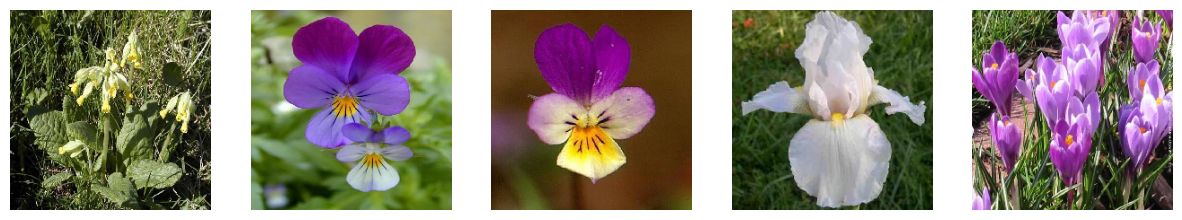

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to display 5 random images
def display_random_images(X):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        index = random.randint(0, len(X)-1)
        plt.subplot(1, 5, i+1)
        plt.imshow(X[index].astype('uint8'))  # Ensure images are in uint8 format for display
        plt.axis('off')
    plt.show()

# Display 5 random images
display_random_images(X)

>> ### **B. Select any image from the dataset and assign it to a variable.**


---



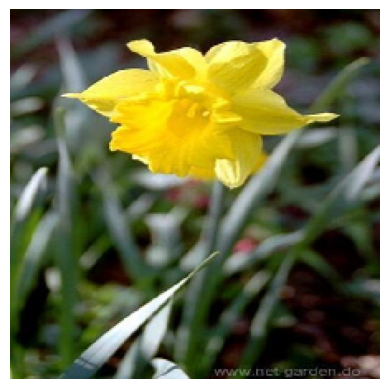

In [ ]:
# Select any image from the dataset and assign it to a variable
selected_image_index = 42  # You can choose any index here
selected_image = X[selected_image_index]

# Display the selected image
plt.imshow(selected_image.astype('uint8'))  # Ensure image is in uint8 format for display
plt.axis('off')
plt.show()

>> ### **C. Transform the image into grayscale format and display the same.**


---



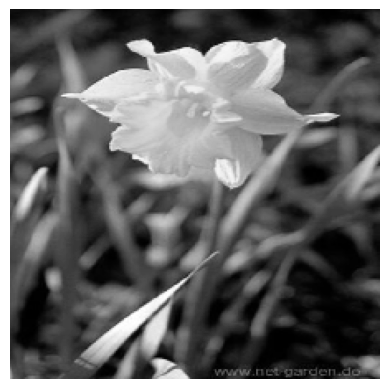

In [ ]:
import cv2

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(selected_image.astype('uint8'), cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

>> ### **D. Apply a filter to sharpen the image and display the image before and after sharpening.**


---



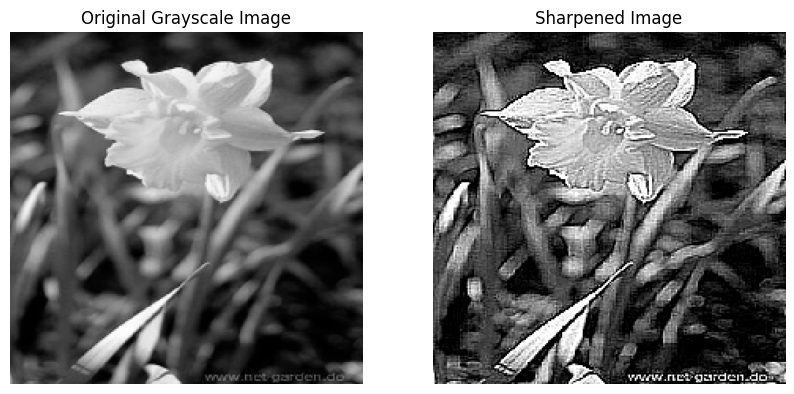

In [ ]:
# Define the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening filter to the grayscale image
sharpened_image = cv2.filter2D(grayscale_image, -1, sharpening_kernel)

# Display the original grayscale image and the sharpened image
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

>> ### **E. Apply a filter to blur the image and display the image before and after blur.**


---



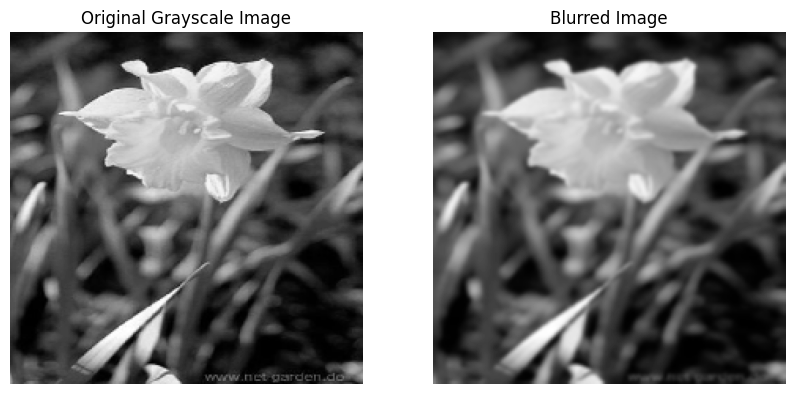

In [ ]:
# Apply Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

# Display the original grayscale image and the blurred image
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()

>> ### **F. Display all the 4 images from above questions besides each other to observe the difference.**


---



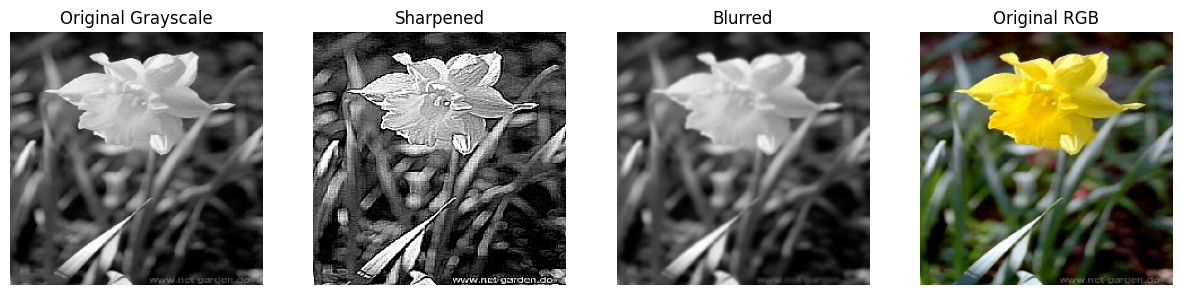

In [ ]:
# Define the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening filter to the grayscale image
sharpened_image = cv2.filter2D(grayscale_image, -1, sharpening_kernel)

# Apply Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

# Display all the images together
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 4, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

# Sharpened image
plt.subplot(1, 4, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened')
plt.axis('off')

# Blurred image
plt.subplot(1, 4, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred')
plt.axis('off')

# Original image
plt.subplot(1, 4, 4)
plt.imshow(selected_image.astype('uint8'))  # Ensure image is in uint8 format for display
plt.title('Original RGB')
plt.axis('off')

plt.show()

> ## **3. Model training and Tuning:**

---



>> ### **A. Split the data into train and test with 80:20 proportion.**


---



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (1088, 224, 224, 3)
Shape of Y_train: (1088, 17)
Shape of X_test: (272, 224, 224, 3)
Shape of Y_test: (272, 17)


In [ ]:
import cv2

# Define the new size
new_size = (100, 100)

# Resize images in X_train
X_train = np.array([cv2.resize(img, new_size) for img in X_train])

# Resize images in X_test
X_test = np.array([cv2.resize(img, new_size) for img in X_test])

# Print the new shapes
print("Shape of X_train resized:", X_train.shape)
print("Shape of X_test resized:", X_test.shape)

Shape of X_train resized: (1088, 100, 100, 3)
Shape of X_test resized: (272, 100, 100, 3)


In [ ]:
# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

>> ### **B. Train a model using any Supervised Learning algorithm and share performance metrics on test data.**


---



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_flat, np.argmax(Y_train, axis=1))

# Predict labels for test set
Y_pred = svm_classifier.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(np.argmax(Y_test, axis=1), Y_pred))

Accuracy: 0.48161764705882354

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.31      0.31        16
           1       0.17      0.50      0.25        10
           2       0.58      0.44      0.50        16
           3       0.45      0.48      0.47        21
           4       0.29      0.27      0.28        15
           5       0.79      0.73      0.76        15
           6       0.50      0.43      0.46        14
           7       0.31      0.18      0.23        22
           8       0.45      0.60      0.51        15
           9       0.79      0.85      0.81        13
          10       0.90      0.50      0.64        18
          11       0.86      0.38      0.52        16
          12       0.45      0.38      0.42        13
          13       0.39      0.61      0.48        18
          14       0.37      0.64      0.47        11
          15       0.53      0.53      0.53        19
          16       1.00    

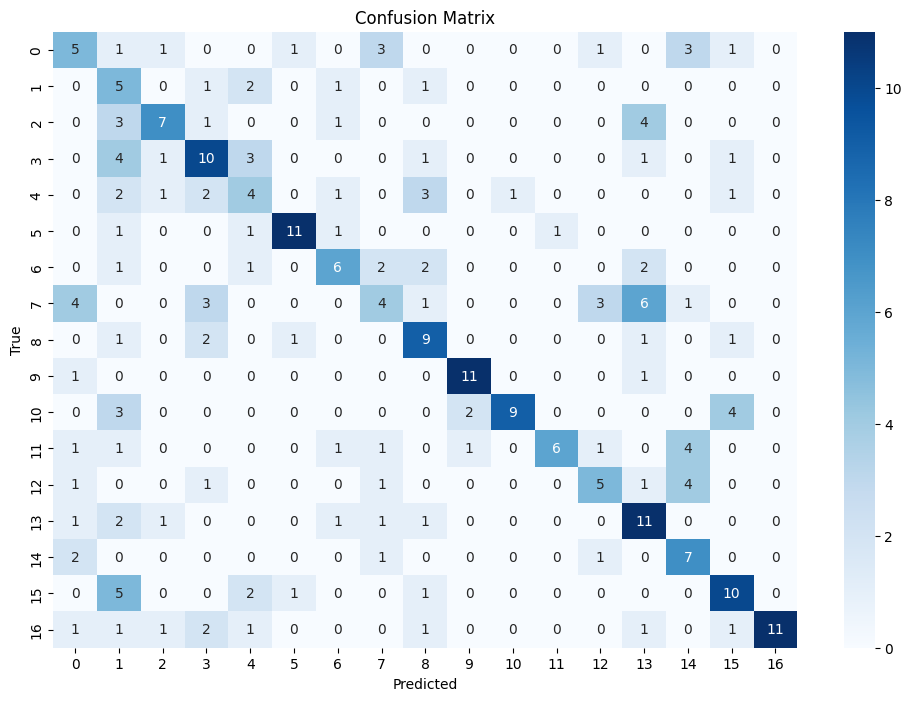

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=range(17), yticklabels=range(17))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd

# Define model name and test accuracy
model_name = "Supervised Learning (SVM)"
test_accuracy = accuracy

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model Name': [model_name],
    'Test Accuracy': [test_accuracy]
})

# Display the DataFrame
results_df

,Model Name,Test Accuracy
0,Supervised Learning (SVM),0.481618


>> ### **C. Train a model using Neural Network and share performance metrics on test data.**


---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network model
def create_nn_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        BatchNormalization(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile the model
nn_model = create_nn_model(input_shape=X_train[0].shape, num_classes=Y_train.shape[1])
optimizer = tf.keras.optimizers.Adam()
nn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 30000)             0         
                                                                 
 batch_normalization_10 (Ba  (None, 30000)             120000    
 tchNormalization)                                               
                                                                 
 dense_16 (Dense)            (None, 512)               15360512  
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_11 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dense_17 (Dense)            (None, 256)              

In [ ]:
# Train the model
history = nn_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/50
34/34 [==============================] - 18s 402ms/step - loss: 3.4498 - accuracy: 0.0662 - val_loss: 2.8323 - val_accuracy: 0.1140
Epoch 2/50
34/34 [==============================] - 13s 378ms/step - loss: 3.2701 - accuracy: 0.0855 - val_loss: 2.6971 - val_accuracy: 0.1140
Epoch 3/50
34/34 [==============================] - 20s 582ms/step - loss: 3.1287 - accuracy: 0.0855 - val_loss: 2.6337 - val_accuracy: 0.1471
Epoch 4/50
34/34 [==============================] - 29s 858ms/step - loss: 3.0236 - accuracy: 0.1085 - val_loss: 2.5592 - val_accuracy: 0.1507
Epoch 5/50
34/34 [==============================] - 21s 615ms/step - loss: 2.8899 - accuracy: 0.1213 - val_loss: 2.4961 - val_accuracy: 0.1765
Epoch 6/50
34/34 [==============================] - 13s 397ms/step - loss: 2.8512 - accuracy: 0.1296 - val_loss: 2.4184 - val_accuracy: 0.2316
Epoch 7/50
34/34 [==============================] - 21s 623ms/step - loss: 2.7420 - accuracy: 0.1379 - val_loss: 2.3444 - val_accuracy: 0.2647

In [ ]:
# Evaluate the model on test data
Y_pred = nn_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(Y_test_classes, Y_pred_classes))

9/9 [==============================] - 1s 38ms/step
Accuracy: 0.47058823529411764

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.38      0.36        16
           1       0.12      0.40      0.18        10
           2       0.50      0.56      0.53        16
           3       0.78      0.33      0.47        21
           4       0.36      0.33      0.34        15
           5       0.73      0.73      0.73        15
           6       0.69      0.64      0.67        14
           7       0.30      0.14      0.19        22
           8       0.58      0.47      0.52        15
           9       0.75      0.69      0.72        13
          10       0.75      0.67      0.71        18
          11       0.44      0.25      0.32        16
          12       0.27      0.62      0.37        13
          13       0.38      0.67      0.48        18
          14       0.00      0.00      0.00        11
          15       0.67      

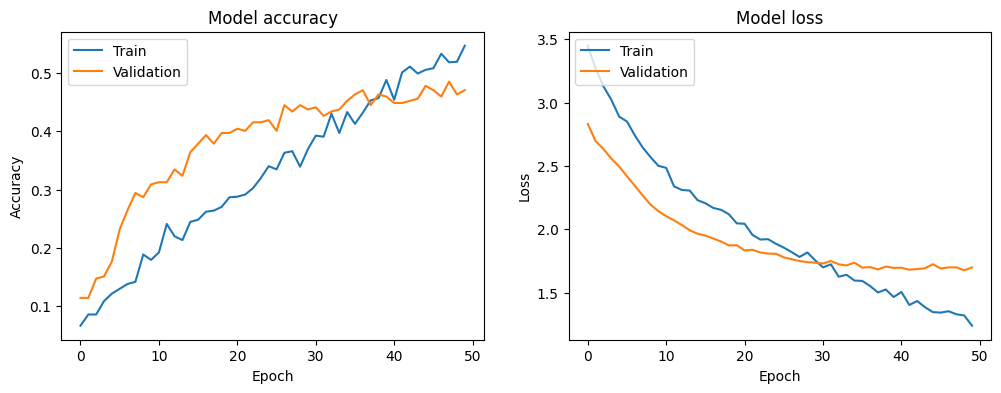

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

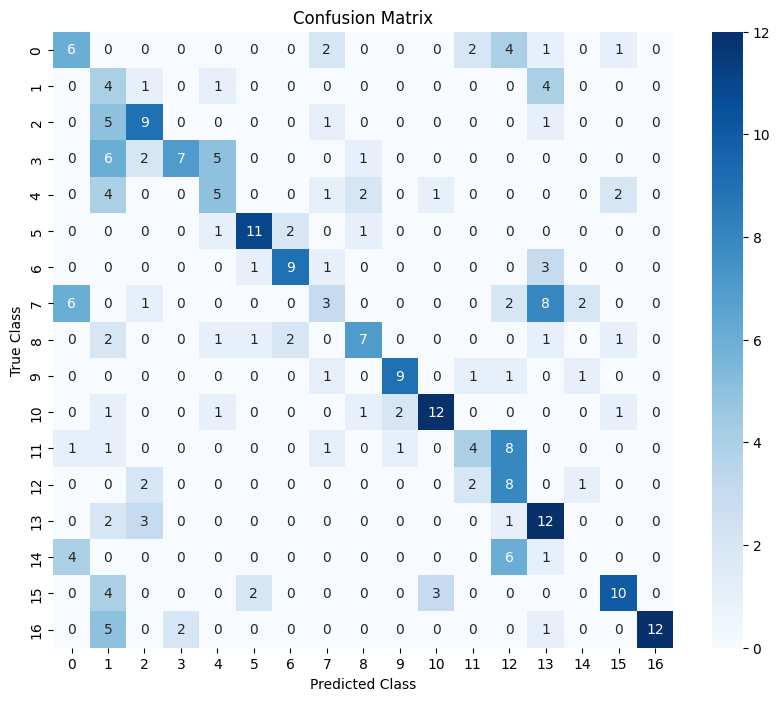

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to flower_classifier_nn_model.h5


In [ ]:
# Plot confusion matrix as a heatmap
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()# Save the model
model_path = "flower_classifier_nn_model.h5"
nn_model.save(model_path)
print(f"Model saved to {model_path}")

In [ ]:
# Store the accuracy into a DataFrame
model_name = "Neural Network"
test_accuracy = accuracy

# Append the accuracy results to the existing DataFrame
new_results = pd.DataFrame({
    'Model Name': [model_name],
    'Test Accuracy': [test_accuracy]
})

results_df = pd.concat([results_df, new_results], ignore_index=True) # Use pd.concat to combine DataFrames

# Display the updated DataFrame
results_df

,Model Name,Test Accuracy
0,Supervised Learning (SVM),0.481618
1,Neural Network,0.470588


>> ### **D. Train a model using a basic CNN and share performance metrics on test data.**


---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(17, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam()
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 49, 49, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 23, 23, 128)      

In [ ]:
# Train the model
history = cnn_model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
34/34 [==============================] - 64s 2s/step - loss: 2.8512 - accuracy: 0.0533 - val_loss: 2.8263 - val_accuracy: 0.0625
Epoch 2/100
34/34 [==============================] - 62s 2s/step - loss: 2.8143 - accuracy: 0.0616 - val_loss: 2.7485 - val_accuracy: 0.1029
Epoch 3/100
34/34 [==============================] - 62s 2s/step - loss: 2.7168 - accuracy: 0.0901 - val_loss: 2.5461 - val_accuracy: 0.1176
Epoch 4/100
34/34 [==============================] - 61s 2s/step - loss: 2.6052 - accuracy: 0.1094 - val_loss: 2.5649 - val_accuracy: 0.1287
Epoch 5/100
34/34 [==============================] - 65s 2s/step - loss: 2.5447 - accuracy: 0.1131 - val_loss: 2.4308 - val_accuracy: 0.1140
Epoch 6/100
34/34 [==============================] - 61s 2s/step - loss: 2.4990 - accuracy: 0.1268 - val_loss: 2.3837 - val_accuracy: 0.1360
Epoch 7/100
34/34 [==============================] - 61s 2s/step - loss: 2.4382 - accuracy: 0.1250 - val_loss: 2.4412 - val_accuracy: 0.1507
Epoch 8/100
3

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict labels for test set
Y_pred_prob = cnn_model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Display classification report
print("\nClassification Report:")
print(classification_report(np.argmax(Y_test, axis=1), Y_pred))

9/9 [==============================] - 4s 426ms/step - loss: 1.2527 - accuracy: 0.6654
Test Accuracy: 0.6654411554336548
9/9 [==============================] - 3s 351ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.12      0.16        16
           1       0.50      0.70      0.58        10
           2       0.69      0.69      0.69        16
           3       0.83      0.71      0.77        21
           4       0.60      0.40      0.48        15
           5       0.92      0.73      0.81        15
           6       0.92      0.86      0.89        14
           7       0.63      0.55      0.59        22
           8       1.00      0.87      0.93        15
           9       0.80      0.92      0.86        13
          10       0.59      0.89      0.71        18
          11       0.33      0.19      0.24        16
          12       0.31      0.77      0.44        13
          13       0.65      0.94      0.77  

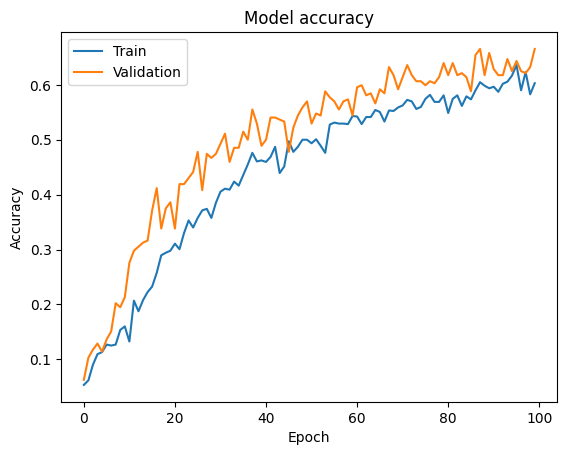

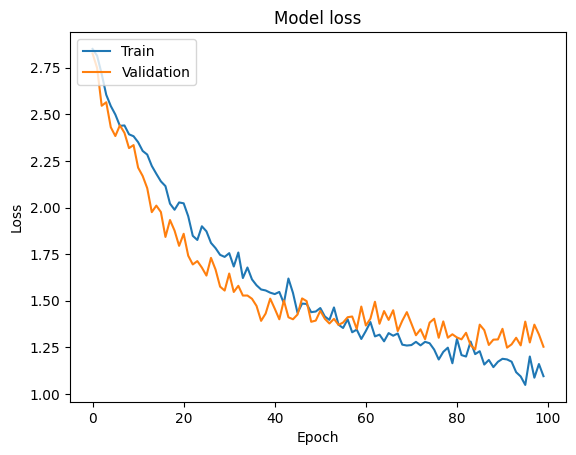

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

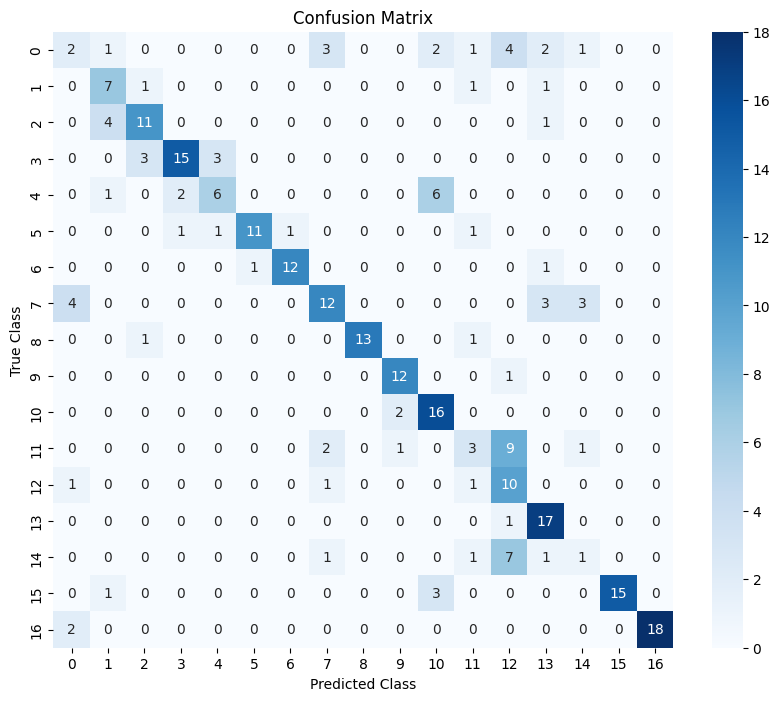

In [ ]:
# Plot confusion matrix as a heatmap
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(17), yticklabels=range(17))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
# Save the model
cnn_model.save("flower_classifier_model.h5")

print("Model saved successfully!")

Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
cnn_model = load_model("flower_classifier_model.h5")

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict labels for test set
Y_pred_prob = cnn_model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)
#print("Accuracy:", accuracy)

9/9 [==============================] - 4s 393ms/step - loss: 1.2527 - accuracy: 0.6654
Test Accuracy: 0.6654411554336548
9/9 [==============================] - 3s 355ms/step


In [ ]:
# Store the accuracy into a DataFrame
model_name = "CNN"
test_accuracy = test_accuracy

# Append the accuracy results to the existing DataFrame
new_results = pd.DataFrame({
    'Model Name': [model_name],
    'Test Accuracy': [test_accuracy]
})

results_df = pd.concat([results_df, new_results], ignore_index=True) # Use pd.concat to combine DataFrames

# Display the updated DataFrame
results_df

,Model Name,Test Accuracy
0,Supervised Learning (SVM),0.481618
1,Neural Network,0.470588
2,CNN,0.665441


>> ### **E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.**


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 225ms/step


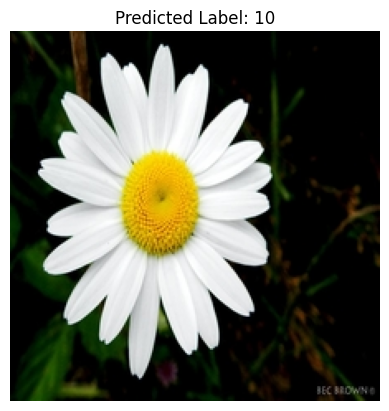

Predicted Label: 10


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/My Drive/GREAT LEARNING MATERIALS/PGP AIML/Module 9: Computer Vision/Alternate project/Dataset/Prediction-1.jpg'
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (100, 100))  # Resize the image to match the input size of the model
preprocessed_image = np.expand_dims(resized_image, axis=0)  # Add an extra dimension to match the model's input shape

# Make predictions using the best performing model (e.g., the CNN model)
predictions = cnn_model.predict(preprocessed_image)
predicted_label = np.argmax(predictions)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

# Display the predicted label
print("Predicted Label:", predicted_label)